In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df = pd.read_csv('DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [8]:
df.shape

(1462, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.495521,7.348103,6.000000,18.857143,27.714286,31.305804,38.714286
humidity,1462.0,60.771702,16.769652,13.428571,50.375000,62.625000,72.218750,100.000000
wind_speed,1462.0,6.802209,4.561602,0.000000,3.475000,6.221667,9.238235,42.220000
meanpressure,1462.0,1011.104548,180.231668,-3.041667,1001.580357,1008.563492,1014.944901,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

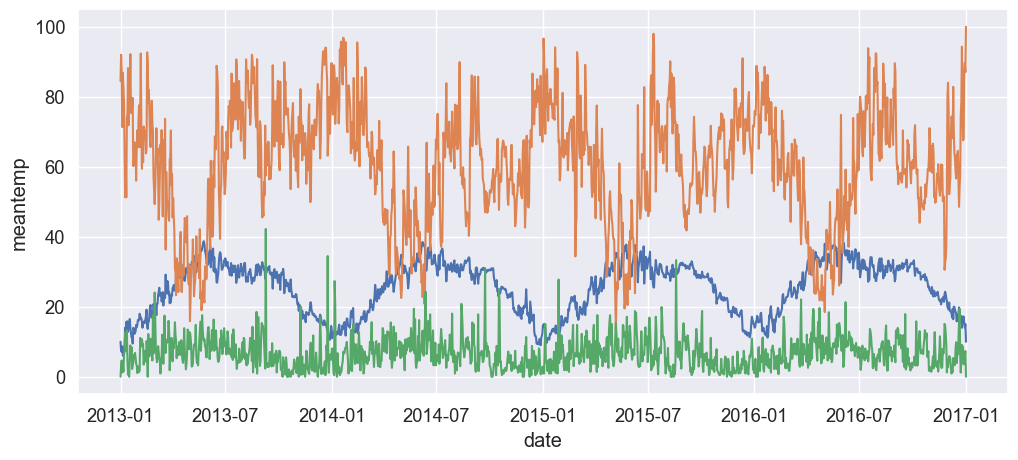

In [24]:
sns.set(rc={'figure.figsize':(12, 5)}, font_scale=1.2, style='darkgrid')

sns.lineplot(df, x='date', y='meantemp')
sns.lineplot(df, x='date', y='humidity')
sns.lineplot(df, x='date', y='wind_speed')
# sns.lineplot(df, x='date', y='meanpressure')

In [51]:
# fig = plt.figure()
# ax = fig.add_subplot(211)
fig = px.line(df, x=df.index, y='meantemp')
fig.show()
# ax2 = fig.add_subplot(212)
# sns.lineplot(x=df.index, y=df['humidity'], ax=ax2)

# fig.add_scatter(x=df.index, y=['humidity'], mode='lines')


<Axes: xlabel='meantemp', ylabel='humidity'>

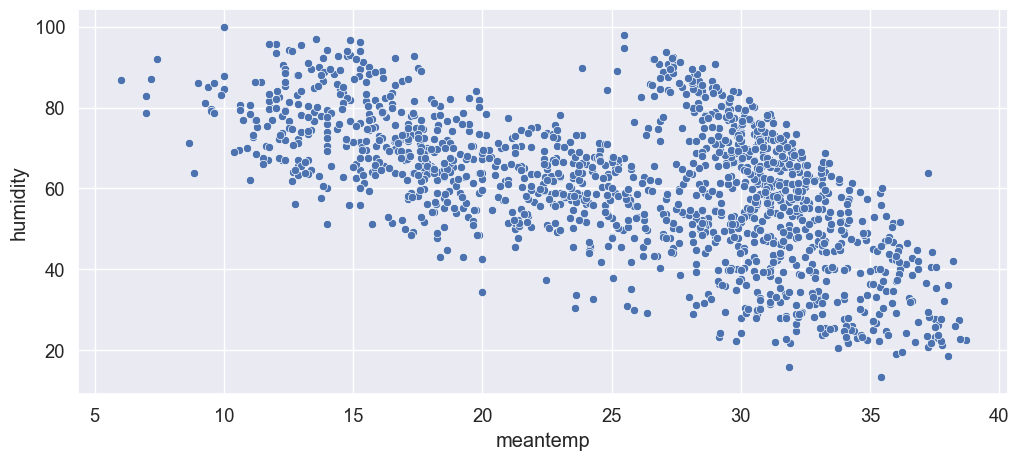

In [57]:
# make a scatter plot of mean temperature and humidity
sns.scatterplot(x='meantemp', y='humidity', data=df)

In [66]:
# scatter plot in plotly with trendline
fig = px.scatter(df, x='meantemp', y='humidity', trendline='ols', trendline_color_override='red')
fig.show()

In [61]:
corr = df.corr()
corr

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.571951,0.306468,-0.038818
humidity,-0.571951,1.000000,-0.373972,0.001734
wind_speed,0.306468,-0.373972,1.000000,-0.020670
meanpressure,-0.038818,0.001734,-0.020670,1.000000


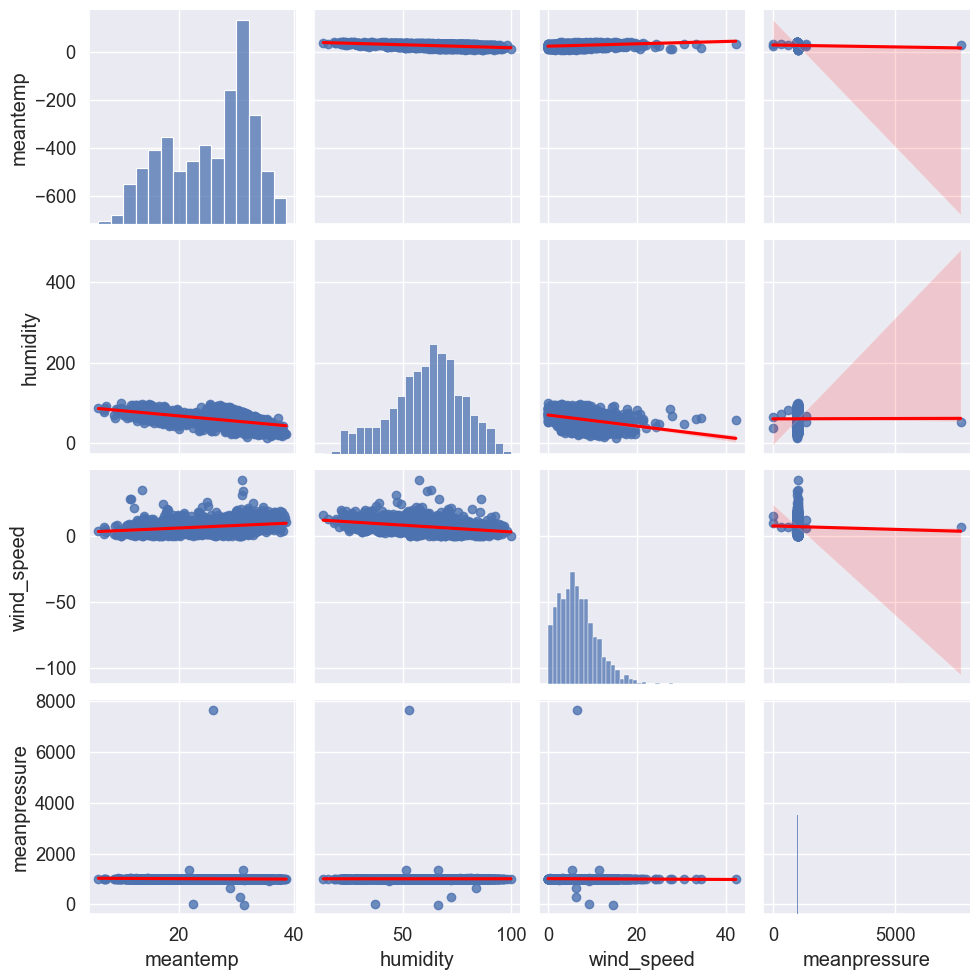

In [74]:

sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}})

<Axes: >

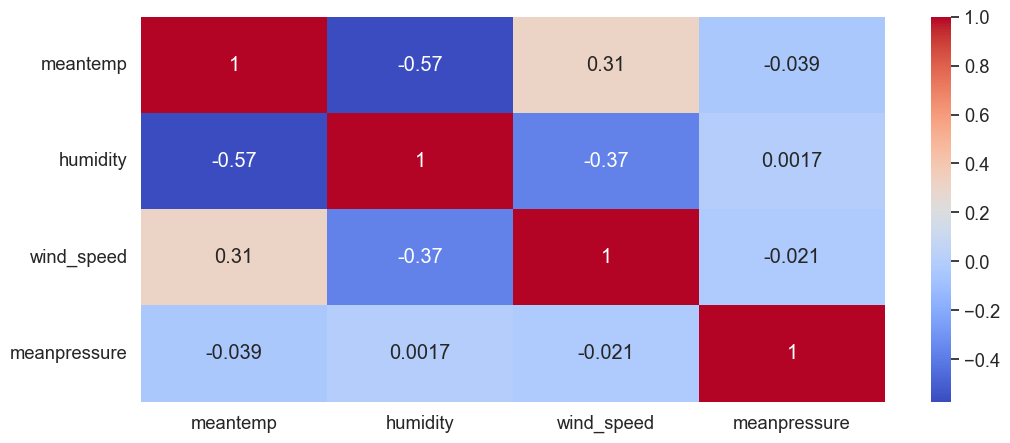

In [78]:


sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [84]:
# lets scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler_2 = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

df_scaled_2 = scaler_2.fit_transform(df)
df_scaled_2 = pd.DataFrame(df_scaled_2, columns=df.columns, index=df.index)

df_scaled.head()


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,0.122271,0.820957,0.000000,0.132603
2013-01-02,0.042795,0.907591,0.070583,0.132881
2013-01-03,0.035662,0.849835,0.109743,0.132994
2013-01-04,0.081514,0.668867,0.029212,0.132799
2013-01-05,0.000000,0.847910,0.087636,0.132712


In [85]:
df_scaled_2.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321
2013-01-02,-2.463454,1.862828,-0.838196,0.037162
2013-01-03,-2.495219,1.564569,-0.475626,0.041972
2013-01-04,-2.291015,0.630022,-1.221233,0.033647
2013-01-05,-2.654044,1.554627,-0.680303,0.029946


In [80]:
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,0.595933,0.546868,0.161113,0.132009
std,0.224614,0.193709,0.108044,0.023460
min,0.000000,0.000000,0.000000,0.000000
25%,0.393013,0.426774,0.082307,0.130770
50%,0.663755,0.568276,0.147363,0.131679
75%,0.773540,0.679094,0.218812,0.132509
max,1.000000,1.000000,1.000000,1.000000


In [86]:
df_scaled_2.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-5.880689e-16
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-5.628829e+00
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-5.286224e-02
50%,3.020541e-01,1.105528e-01,-1.273107e-01,-1.410365e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,2.131517e-02
max,1.799551e+00,2.340044e+00,7.766988e+00,3.701076e+01


<Axes: >

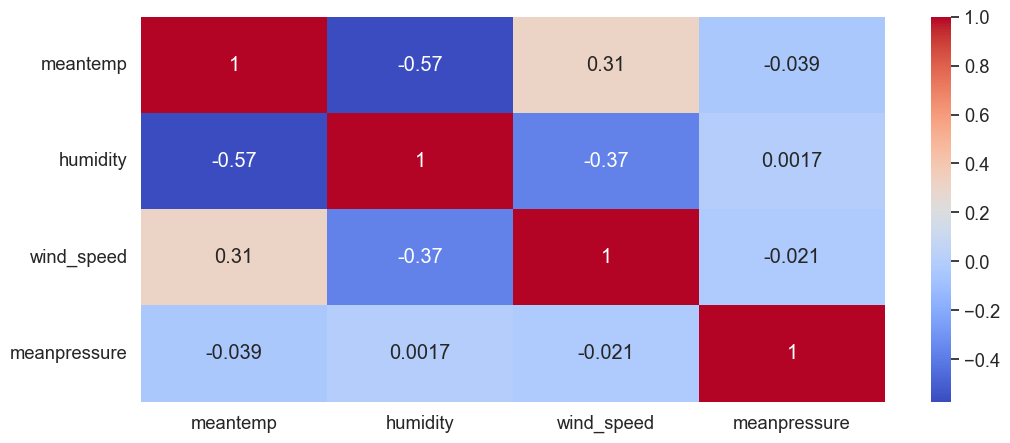

In [82]:
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='date', ylabel='meantemp'>

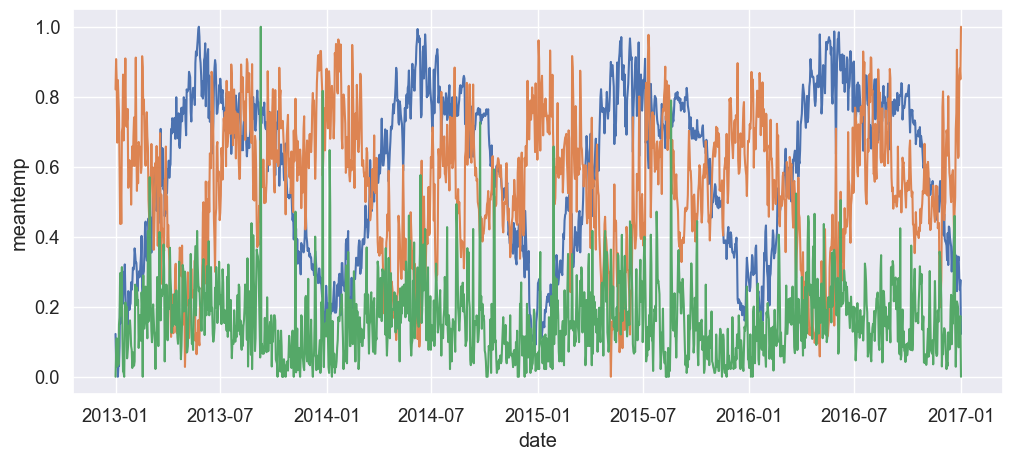

In [91]:
sns.set(rc={'figure.figsize':(12, 5)}, font_scale=1.2, style='darkgrid')

sns.lineplot(df_scaled, x='date', y='meantemp')
sns.lineplot(df_scaled, x='date', y='humidity')
sns.lineplot(df_scaled, x='date', y='wind_speed')
# sns.lineplot(df_scaled, x='date', y='meanpressure')

<Axes: xlabel='date', ylabel='meantemp'>

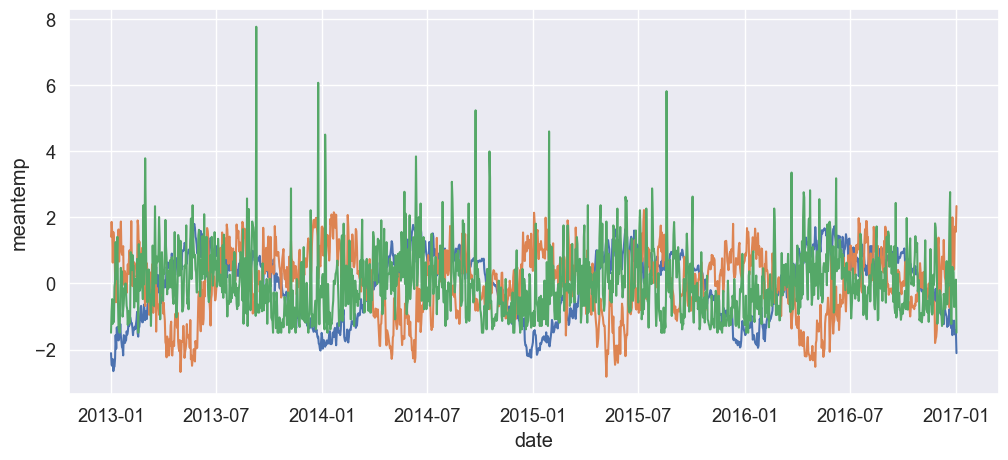

In [88]:
sns.set(rc={'figure.figsize':(12, 5)}, font_scale=1.2, style='darkgrid')

sns.lineplot(df_scaled_2, x='date', y='meantemp')
sns.lineplot(df_scaled_2, x='date', y='humidity')
sns.lineplot(df_scaled_2, x='date', y='wind_speed')

In [92]:
px.line(x=df.index, y=df.meanpressure)

In [93]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [105]:
df.loc['2016-3-28', 'meanpressure'] = (df.loc['2016-3-27', 'meanpressure'] + df.loc['2016-3-29', 'meanpressure']) / 2


In [108]:
df.loc['2016-03-28', 'meanpressure']

1012.0625

In [107]:
px.line(x=df.index, y=df.meanpressure)

In [109]:
df.loc['2016-03-28']

meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [115]:
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,0.122271,0.820957,0.000000,0.132603,1,2013
2013-01-02,0.042795,0.907591,0.070583,0.132881,1,2013
2013-01-03,0.035662,0.849835,0.109743,0.132994,1,2013
2013-01-04,0.081514,0.668867,0.029212,0.132799,1,2013
2013-01-05,0.000000,0.847910,0.087636,0.132712,1,2013


In [116]:
df_scaled.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [117]:
df_scaled.year.unique()

array([2013, 2014, 2015, 2016, 2017])

<Axes: xlabel='month', ylabel='meantemp'>

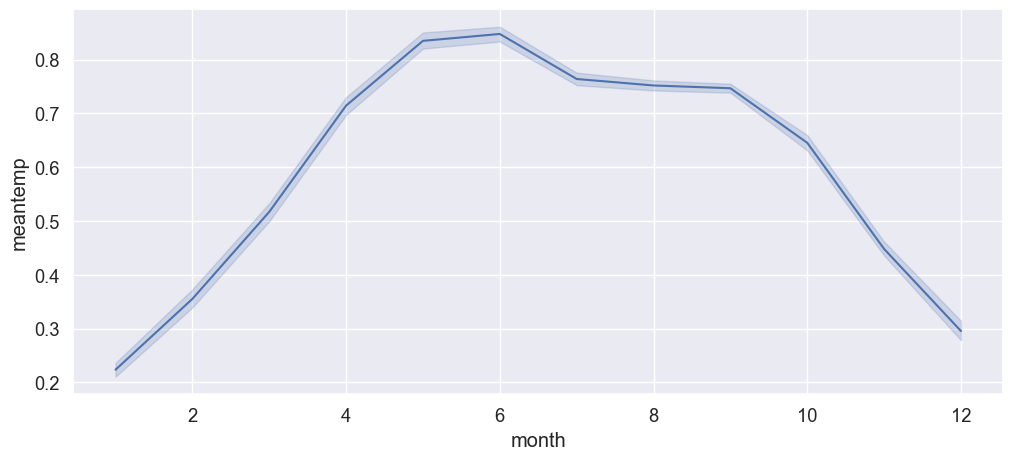

In [119]:
sns.lineplot(df_scaled, x = 'month', y='meantemp')

In [120]:
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


<Axes: xlabel='month', ylabel='meantemp'>

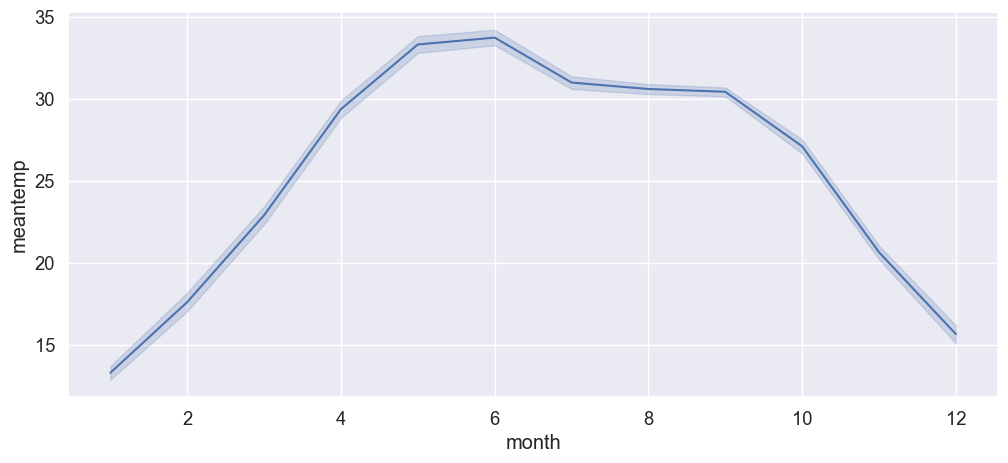

In [134]:
sns.lineplot(df, x = 'month', y='meantemp')

(0.0, 13.0)

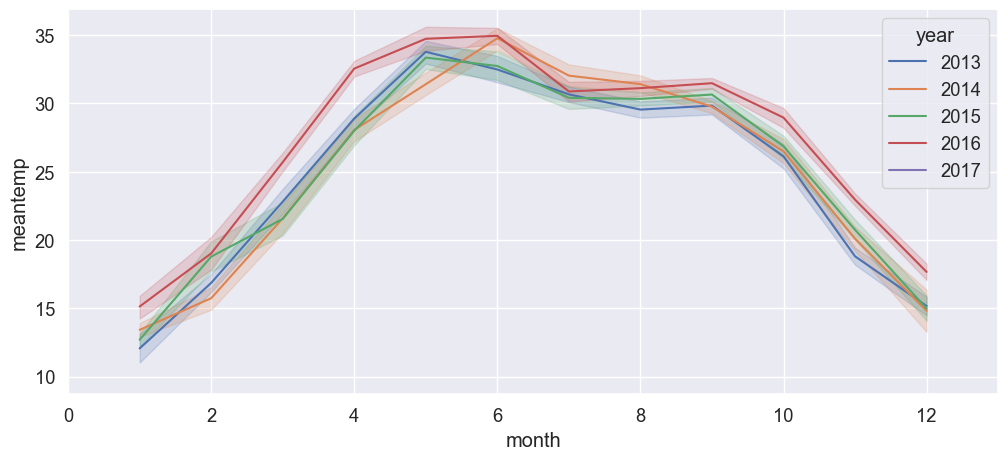

In [133]:
sns.lineplot(df, x = 'month', y='meantemp', hue='year', palette='deep')
plt.xlim(0, 13)

<Axes: xlabel='month', ylabel='meantemp'>

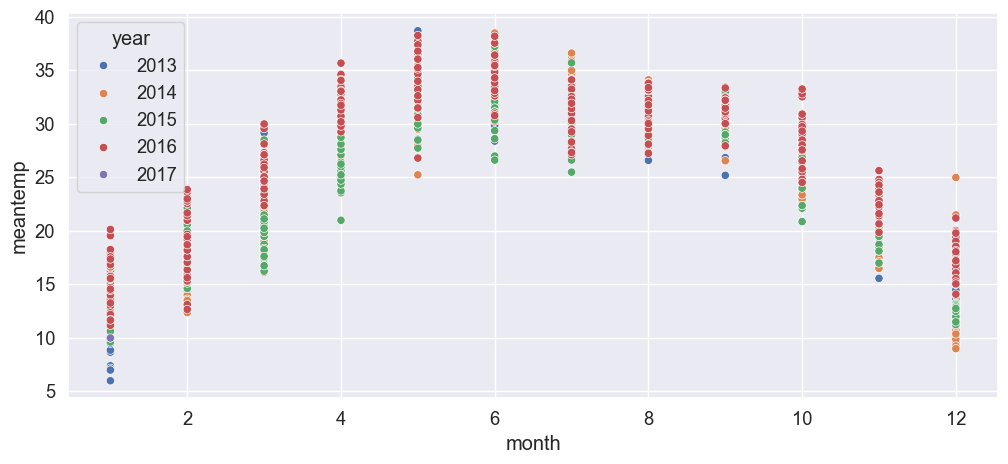

In [126]:
sns.scatterplot(df, x = 'month', y='meantemp', hue='year', palette='deep')

In [128]:
px.scatter(df, x='month', y='meantemp', color='year')

In [136]:
fig = px.line(df_scaled, x = df_scaled.index, y = 'meantemp', color='year')
fig.show()

# Prophet model from Python

In [138]:
!pip install prophet    

In [143]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


In [148]:
df = pd.read_csv(r'g:/Other computers/My Laptop/Ph.D/Misc/Codanics/Pandas Tips and Tricks/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [149]:
#rename the date and meantemp columns
df.rename(columns={'date': 'ds',
                   'meantemp':'y'},
                   inplace=True)

In [150]:
df.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [152]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [155]:
model = Prophet()

model.fit(df)

future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

fig = plot_plotly(model, forecast)

fig.show()

10:26:32 - cmdstanpy - INFO - Chain [1] start processing
10:26:33 - cmdstanpy - INFO - Chain [1] done processing


In [157]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.689997,9.060083,14.492580,24.689997,24.689997,-12.939197,-12.939197,-12.939197,0.034058,0.034058,0.034058,-12.973255,-12.973255,-12.973255,0.0,0.0,0.0,11.750800
1,2013-01-02,24.690142,9.169124,14.668456,24.690142,24.690142,-12.803590,-12.803590,-12.803590,0.146275,0.146275,0.146275,-12.949865,-12.949865,-12.949865,0.0,0.0,0.0,11.886552
2,2013-01-03,24.690287,9.386994,14.323222,24.690287,24.690287,-12.844073,-12.844073,-12.844073,0.067163,0.067163,0.067163,-12.911235,-12.911235,-12.911235,0.0,0.0,0.0,11.846214
3,2013-01-04,24.690432,9.452238,14.419336,24.690432,24.690432,-12.831776,-12.831776,-12.831776,0.027535,0.027535,0.027535,-12.859310,-12.859310,-12.859310,0.0,0.0,0.0,11.858656
4,2013-01-05,24.690577,9.515687,14.467681,24.690577,24.690577,-12.865204,-12.865204,-12.865204,-0.069124,-0.069124,-0.069124,-12.796081,-12.796081,-12.796081,0.0,0.0,0.0,11.825373
